In [3]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import re
import string
from nltk.corpus import stopwords,words
from sklearn.feature_extraction.text import TfidfVectorizer ,CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA, LatentDirichletAllocation, TruncatedSVD, NMF
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [4]:
pd.set_option('display.max_colwidth', None)
data = pd.read_csv('data_input.csv')
data.shape

(86209, 2)

In [5]:
sample = data.head(80000)
sample

,id,abstract
0,0,"Turing machines and G\""odel numbers are important pillars of the theory of computation. Thus, any computational architecture needs to show how it could relate to Turing machines and how stable implementations of Turing computation are possible. In this chapter, we implement universal Turing computation in a neural field environment. To this end, we employ the canonical symbologram representation of a Turing machine obtained from a G\""odel encoding of its symbolic repertoire and generalized shifts. The resulting nonlinear dynamical automaton (NDA) is a piecewise affine-linear map acting on the unit square that is partitioned into rectangular domains. Instead of looking at point dynamics in phase space, we then consider functional dynamics of probability distributions functions (p.d.f.s) over phase space. This is generally described by a Frobenius-Perron integral transformation that can be regarded as a neural field equation over the unit square as feature space of a dynamic field theory (DFT). Solving the Frobenius-Perron equation yields that uniform p.d.f.s with rectangular support are mapped onto uniform p.d.f.s with rectangular support, again. We call the resulting representation \emph{dynamic field automaton}."
1,1,"RNA-sequencing has revolutionized biomedical research and, in particular, our ability to study gene alternative splicing. The problem has important implications for human health, as alternative splicing may be involved in malfunctions at the cellular level and multiple diseases. However, the high-dimensional nature of the data and the existence of experimental biases pose serious data analysis challenges. We find that the standard data summaries used to study alternative splicing are severely limited, as they ignore a substantial amount of valuable information. Current data analysis methods are based on such summaries and are hence suboptimal. Further, they have limited flexibility in accounting for technical biases. We propose novel data summaries and a Bayesian modeling framework that overcome these limitations and determine biases in a nonparametric, highly flexible manner. These summaries adapt naturally to the rapid improvements in sequencing technology. We provide efficient point estimates and uncertainty assessments. The approach allows to study alternative splicing patterns for individual samples and can also be the basis for downstream analyses. We found a severalfold improvement in estimation mean square error compared popular approaches in simulations, and substantially higher consistency between replicates in experimental data. Our findings indicate the need for adjusting the routine summarization and analysis of alternative splicing RNA-seq studies. We provide a software implementation in the R package casper."
2,2,"Queuing models provide insight into the temporal inhomogeneity of human dynamics, characterized by the broad distribution of waiting times of individuals performing tasks. We study the queuing model of an agent trying to execute a task of interest, the priority of which may vary with time due to the agent's ""state of mind."" However, its execution is disrupted by other tasks of random priorities. By considering the priority of the task of interest either decreasing or increasing algebraically in time, we analytically obtain and numerically confirm the bimodal and unimodal waiting time distributions with power-law decaying tails, respectively. These results are also compared to the updating time distribution of papers in the arXiv.org and the processing time distribution of papers in Physical Review journals. Our analysis helps to understand human task execution in a more realistic scenario."
3,3,"In a multiple-object auction, every bidder tries to win as many objects as possible with a bidding algorithm. This paper studies position-randomized auctions, which form a special class of multiple-object auctions where a bidding algorithm consists of an initial bid sequence

In [21]:

def cleaning_text(text):
    #Lower case 
    text = text.lower()
    
    #Removing numbers 
    text = "".join([i for i in text if not i.isdigit()])
    
    #Removing Punctuations
    text = "".join([i for i in text if i not in string.punctuation])
    
    #Tokenizing
    tokens = word_tokenize(text)
    
    
    #Remonig stop words +Lemmatization 

    lemmatizer = WordNetLemmatizer()
    
    stop_words= stopwords.words('english')



    text = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    
    return text

## 1. CountVectorization 

In [ ]:
CV = CountVectorizer(analyzer=cleaning_text)
CV_ = CV.fit_transform(sample['abstract'])
CV_.shape

In [ ]:
df = pd.DataFrame(CV_.toarray(),columns = CV.get_feature_names())
df

## 1.1 CountVectorization Using (1, 2) Grams

In [ ]:
# the numbers are not removed here
CV_grams = CountVectorizer(stop_words= 'english', ngram_range = (1,2))
result2 = CV_grams.fit_transform(sample['abstract'])
result2.shape

In [ ]:
df_grams = pd.DataFrame(result2.toarray(),columns = CV_grams.get_feature_names())
df_grams

## 2. Documents similarity

## 2.1 Cosine similarity with BOW (CountVectorizer)

In [ ]:
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(CV_, CV_)

print(cosine_sim[1])

#df22= pd.DataFrame(cosine_sim[11])

#df22.to_csv('check.csv')


## 2.1  BOW (CountVectorizer) and TF-IDF

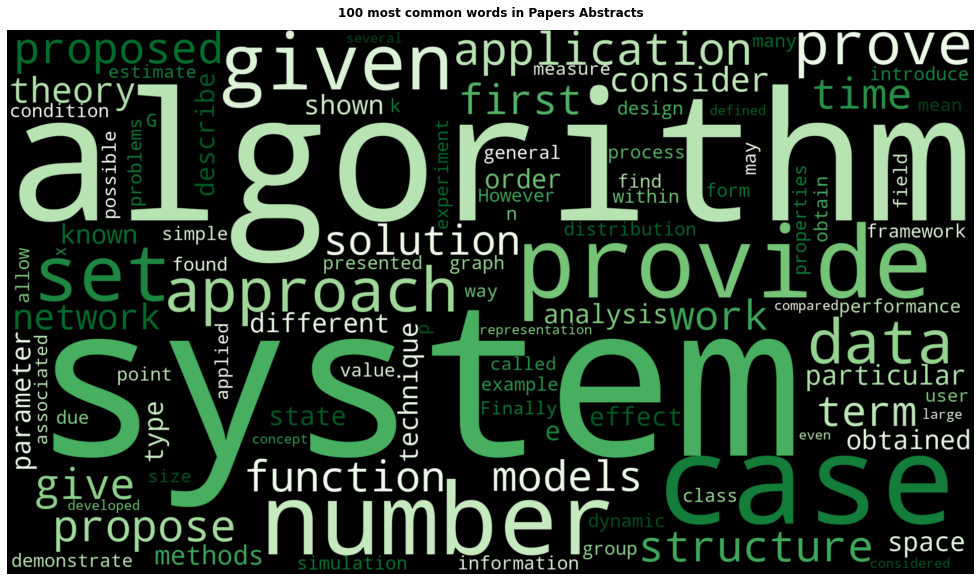

In [6]:
# Create a WordCloud 
 
long_string = ','.join(list(sample.abstract.values))

wordcloud = WordCloud(stopwords=stop_words ,width=1920, height=1080, 
                      background_color="Black", max_words=100, contour_width=3, 
                      colormap='Greens', random_state=720)

wordcloud.generate(long_string)

plt.figure(figsize=(25,10))

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis('off')

plt.title("100 most common words in Papers Abstracts", pad = 14, weight = 'bold')

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.show()

In [22]:
CV_TF_IDF = TfidfVectorizer(analyzer=cleaning_text,ngram_range = (1,2))
CV_TF_IDF_ = CV_TF_IDF.fit_transform(sample['abstract'])
CV_TF_IDF_.shape

(80000, 163045)

In [15]:
#df_tf = pd.DataFrame(CV_TF_IDF_.toarray(),columns = CV_TF_IDF.get_feature_names())
#df_tf

# Dimensionality Reduction & Topic Modeling 

In [12]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    """
    A helper function to display topic names for dimensionality reduction
    algorithms that do not have built in function or method to display
    topics.
    """
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

## LSA 

In [69]:
lsa = TruncatedSVD(n_components=6, random_state=None)
lsa.fit(CV_TF_IDF_)

TruncatedSVD(n_components=6)

In [70]:
display_topics(model=lsa, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=10)


Topic  0
model, algorithm, problem, method, data, system, result, function, paper, network

Topic  1
group, algebra, space, g, manifold, prove, finite, operator, theorem, x

Topic  2
field, energy, wave, equation, electron, beam, particle, magnetic, laser, quantum

Topic  3
network, group, system, algebra, user, information, service, node, software, language

Topic  4
graph, algorithm, problem, network, n, time, vertex, solution, node, edge

Topic  5
network, group, graph, model, g, distribution, node, estimator, random, n


## NMF

In [23]:
nmf_model = NMF(n_components=6, random_state=None)
nmf_model.fit(CV_TF_IDF_)

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=6)

In [24]:
display_topics(model=nmf_model, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=30)
# Statistics
# Math
# Physics
# CS
# AI
# IT and Network


Topic  0
model, distribution, method, estimator, function, data, parameter, estimation, variable, regression, process, sample, random, likelihood, bayesian, estimate, probability, test, approach, asymptotic, inference, procedure, error, proposed, gaussian, prior, matrix, rate, density, based

Topic  1
group, algebra, space, g, manifold, prove, finite, operator, theorem, class, x, theory, ring, category, result, give, lie, compact, function, show, let, complex, invariant, cohomology, symplectic, structure, map, action, property, representation

Topic  2
field, energy, wave, equation, electron, particle, beam, magnetic, laser, quantum, effect, state, plasma, flow, frequency, optical, pulse, velocity, mode, light, theory, time, atom, surface, interaction, phase, dynamic, potential, solution, ion

Topic  3
system, data, information, paper, approach, image, user, method, application, language, based, software, technique, analysis, design, used, present, using, feature, use, new, web, diffe

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# What is the best number of components?

In [16]:
nmf_model = NMF(n_components=10, random_state=None)
nmf_model.fit(CV_TF_IDF_)

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=10)

In [ ]:
display_topics(model=nmf_model, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=20)

## PCA

In [17]:
topic_results = nmf_model.transform(CV_TF_IDF_)

In [18]:
pca2 = PCA(n_components=10)
pca2.fit(topic_results)
pcafeatures_train2 = pca2.transform(topic_results)

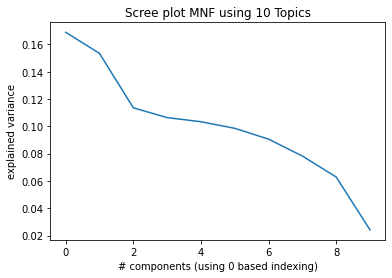

In [19]:
plt.plot(pca2.explained_variance_ratio_)
plt.xlabel('# components (using 0 based indexing)')
plt.ylabel('explained variance');
plt.title('Scree plot MNF using 10 Topics');

In [80]:
nmf_final = NMF(n_components=6, random_state=None)
nmf_final.fit(CV_TF_IDF_)

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=6)

In [81]:
display_topics(model=nmf_final, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=20) 
# 6 statistics, math (not good), physics, cs, linear algebra, IT & Network


Topic  0
model, distribution, method, estimator, function, data, parameter, estimation, variable, regression, process, sample, random, likelihood, bayesian, estimate, probability, test, approach, asymptotic

Topic  1
group, algebra, space, g, manifold, prove, finite, operator, theorem, class, x, theory, ring, category, result, give, lie, compact, function, show

Topic  2
field, energy, wave, equation, electron, particle, beam, magnetic, laser, quantum, effect, state, plasma, flow, frequency, optical, pulse, velocity, mode, light

Topic  3
system, data, information, paper, approach, image, user, method, application, language, based, software, technique, analysis, design, used, present, using, feature, use

Topic  4
algorithm, problem, graph, n, time, bound, number, set, solution, complexity, polynomial, vertex, matrix, show, approximation, optimization, optimal, given, tree, edge

Topic  5
network, node, social, sensor, wireless, protocol, community, structure, link, routing, neural, m

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
topic_results_final = nmf_model.transform(CV_TF_IDF_)

In [26]:
# sklearn implements t-SNE.
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
#from sklearn.manifold.t_sne import (_joint_probabilities,
                                    #_kl_divergence)
RS = 20200807

# Import seaborn and matplotlib.patheffects to make nice plots.
import seaborn as sns
import matplotlib.patheffects as PathEffects

In [27]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("colorblind", 8))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [28]:
X = TSNE(random_state=RS).fit_transform(topic_results_final)
# X = topic_results
y = topic_results_final.argmax(axis=1)

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<ipython-input-27-7c2b34eb9d76>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=palette[colors.astype(np.int)])
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_methods.py:180: RuntimeWarning: inval

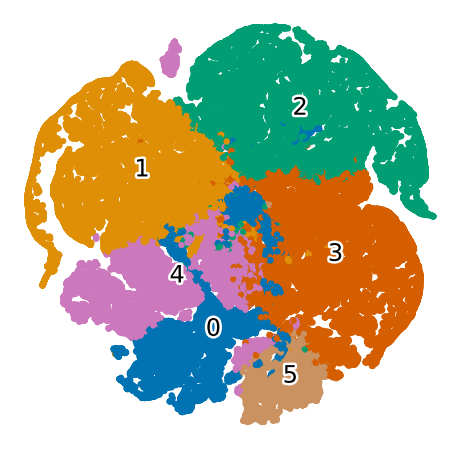

In [29]:
scatter(X, y);

# Adding the topics and more EDA

In [41]:
topic_results = nmf_model.transform(CV_TF_IDF_)

sample['abstract_topic'] = topic_results.argmax(axis=1)

<ipython-input-41-aad405bf58f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['abstract_topic'] = topic_results.argmax(axis=1)


In [42]:
final_df_t = sample.reset_index()


In [43]:
conditions = [final_df_t['abstract_topic'] == 0, final_df_t['abstract_topic'] == 1 ,final_df_t['abstract_topic'] == 2, final_df_t['abstract_topic'] == 3,final_df_t['abstract_topic'] == 4,final_df_t['abstract_topic'] == 5]
choices = ["Statistics", 'Math', 'Physics','CS','ML','IT and Network']

In [44]:
final_df_t['abstract_topic'] = np.select(conditions, choices,
   default = np.nan)

In [45]:
final_df_t.head(10)

,index,id,abstract,abstract_topic
0,0,0,"Turing machines and G\""odel numbers are important pillars of the theory of computation. Thus, any computational architecture needs to show how it could relate to Turing machines and how stable implementations of Turing computation are possible. In this chapter, we implement universal Turing computation in a neural field environment. To this end, we employ the canonical symbologram representation of a Turing machine obtained from a G\""odel encoding of its symbolic repertoire and generalized shifts. The resulting nonlinear dynamical automaton (NDA) is a piecewise affine-linear map acting on the unit square that is partitioned into rectangular domains. Instead of looking at point dynamics in phase space, we then consider functional dynamics of probability distributions functions (p.d.f.s) over phase space. This is generally described by a Frobenius-Perron integral transformation that can be regarded as a neural field equation over the unit square as feature space of a dynamic field theory (DFT). Solving the Frobenius-Perron equation yields that uniform p.d.f.s with rectangular support are mapped onto uniform p.d.f.s with rectangular support, again. We call the resulting representation \emph{dynamic field automaton}.",Physics
1,1,1,"RNA-sequencing has revolutionized biomedical research and, in particular, our ability to study gene alternative splicing. The problem has important implications for human health, as alternative splicing may be involved in malfunctions at the cellular level and multiple diseases. However, the high-dimensional nature of the data and the existence of experimental biases pose serious data analysis challenges. We find that the standard data summaries used to study alternative splicing are severely limited, as they ignore a substantial amount of valuable information. Current data analysis methods are based on such summaries and are hence suboptimal. Further, they have limited flexibility in accounting for technical biases. We propose novel data summaries and a Bayesian modeling framework that overcome these limitations and determine biases in a nonparametric, highly flexible manner. These summaries adapt naturally to the rapid improvements in sequencing technology. We provide efficient point estimates and uncertainty assessments. The approach allows to study alternative splicing patterns for individual samples and can also be the basis for downstream analyses. We found a severalfold improvement in estimation mean square error compared popular approaches in simulations, and substantially higher consistency between replicates in experimental data. Our findings indicate the need for adjusting the routine summarization and analysis of alternative splicing RNA-seq studies. We provide a software implementation in the R package casper.",CS
2,2,2,"Queuing models provide insight into the temporal inhomogeneity of human dynamics, characterized by the broad distribution of waiting times of individuals performing tasks. We study the queuing model of an agent trying to execute a task of interest, the priority of which may vary with time due to the agent's ""state of mind."" However, its execution is disrupted by other tasks of random priorities. By considering the priority of the task of interest either decreasing or increasing algebraically in time, we analytically obtain and numerically confirm the bimodal and unimodal waiting time distributions with power-law decaying tails, respectively. These results are also compared to the updating time distribution of papers in the arXiv.org and the processing time distribution of papers in Physical Review journals. Our analysis helps to understand human task execution in a more realistic scenario.",Statistics
3,3,3,"In a multiple-object auction, every bidder tries to win as many objects as possible with a bidding algorithm. This paper studies position-randomized auctions, which form a special class of multiple-object auctions where a bi

findfont: Font family ['Trebuchet MS Bold'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Trebuchet MS Bold'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Trebuchet MS Bold'] not found. Falling back to DejaVu Sans.


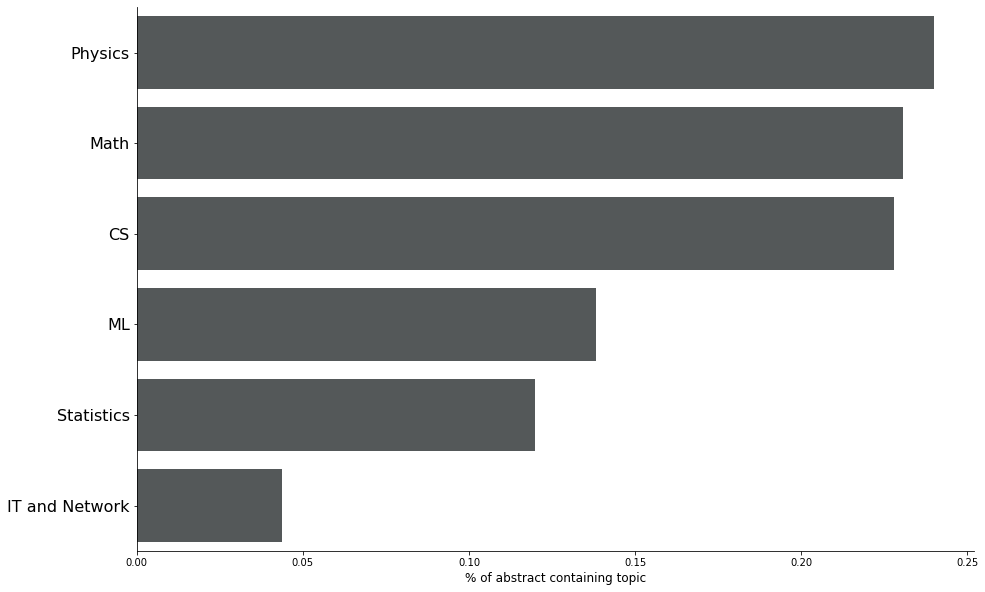

In [46]:
t_font = {'fontname':'Trebuchet MS Bold'}
emphasize = ['comfort']
plt.figure(figsize=(15,10))
plt.yticks(**t_font, size=16) 
plt.xticks(**t_font) 
plt.rc('ytick', labelsize=12) 
sns.barplot(y=final_df_t['abstract_topic'].value_counts().index, 
            x=final_df_t['abstract_topic'].value_counts(normalize=True, ascending=False), 
            data=final_df_t, orient='h', 
            color='#545859',saturation=1
           )
plt.xlabel('% of abstract containing topic', fontsize=12, **t_font)
# plt.ylabel(fontsize=12, **t_font)

sns.despine();

In [47]:
topics=pd.DataFrame(topic_results, columns=['Topic_'+str(x) for x in range(topic_results.shape[1])])

In [48]:
topics = topics.reset_index()

In [49]:
topics.head()

,index,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,0,0.003187,0.015224,0.021968,0.009556,0.002376,0.001751
1,1,0.020595,0.000000,0.000000,0.035689,0.000000,0.000000
2,2,0.021092,0.000000,0.006001,0.015441,0.005504,0.005008
3,3,0.000000,0.001209,0.000000,0.001383,0.038962,0.000000
4,4,0.005467,0.018269,0.002185,0.005446,0.001616,0.000000


In [50]:
final_df = final_df_t.merge(topics, on='index', how='left')

In [52]:
final_df.head(10)

,index,id,abstract,abstract_topic,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,0,0,"Turing machines and G\""odel numbers are important pillars of the theory of computation. Thus, any computational architecture needs to show how it could relate to Turing machines and how stable implementations of Turing computation are possible. In this chapter, we implement universal Turing computation in a neural field environment. To this end, we employ the canonical symbologram representation of a Turing machine obtained from a G\""odel encoding of its symbolic repertoire and generalized shifts. The resulting nonlinear dynamical automaton (NDA) is a piecewise affine-linear map acting on the unit square that is partitioned into rectangular domains. Instead of looking at point dynamics in phase space, we then consider functional dynamics of probability distributions functions (p.d.f.s) over phase space. This is generally described by a Frobenius-Perron integral transformation that can be regarded as a neural field equation over the unit square as feature space of a dynamic field theory (DFT). Solving the Frobenius-Perron equation yields that uniform p.d.f.s with rectangular support are mapped onto uniform p.d.f.s with rectangular support, again. We call the resulting representation \emph{dynamic field automaton}.",Physics,0.003187,0.015224,0.021968,0.009556,0.002376,0.001751
1,1,1,"RNA-sequencing has revolutionized biomedical research and, in particular, our ability to study gene alternative splicing. The problem has important implications for human health, as alternative splicing may be involved in malfunctions at the cellular level and multiple diseases. However, the high-dimensional nature of the data and the existence of experimental biases pose serious data analysis challenges. We find that the standard data summaries used to study alternative splicing are severely limited, as they ignore a substantial amount of valuable information. Current data analysis methods are based on such summaries and are hence suboptimal. Further, they have limited flexibility in accounting for technical biases. We propose novel data summaries and a Bayesian modeling framework that overcome these limitations and determine biases in a nonparametric, highly flexible manner. These summaries adapt naturally to the rapid improvements in sequencing technology. We provide efficient point estimates and uncertainty assessments. The approach allows to study alternative splicing patterns for individual samples and can also be the basis for downstream analyses. We found a severalfold improvement in estimation mean square error compared popular approaches in simulations, and substantially higher consistency between replicates in experimental data. Our findings indicate the need for adjusting the routine summarization and analysis of alternative splicing RNA-seq studies. We provide a software implementation in the R package casper.",CS,0.020595,0.000000,0.000000,0.035689,0.000000,0.000000
2,2,2,"Queuing models provide insight into the temporal inhomogeneity of human dynamics, characterized by the broad distribution of waiting times of individuals performing tasks. We study the queuing model of an agent trying to execute a task of interest, the priority of which may vary with time due to the agent's ""state of mind."" However, its execution is disrupted by other tasks of random priorities. By considering the priority of the task of interest either decreasing or increasing algebraically in time, we analytically obtain and numerically confirm the bimodal and unimodal waiting time distributions with power-law decaying tails, respectively. These results are also compared to the updating time distribution of papers in the arXiv.org and the processing time distribution of papers in Physical Review journals. Our analysis helps to understand human task execution in a more realistic scenario.",Statistics,0.021092,0.000000,0.006001,0.015441,0.005504,0.005008
3,3,3,"In a multiple-

## Topics Word Clouds 

### Physics

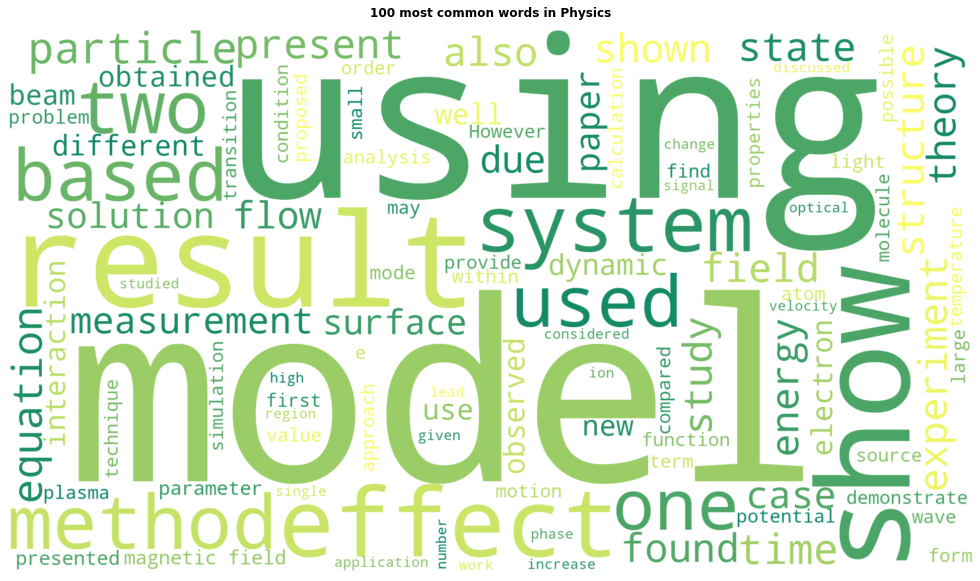

In [112]:
# Create a WordCloud 
py_df = final_df_t[(final_df_t['abstract_topic']=='Physics')]

long_string = ','.join(list(py_df.abstract.values))

wordcloud = WordCloud(stopwords=stopwords.words('english') ,width=1920, height=1080, 
                      background_color="white", max_words=100, contour_width=3, 
                      colormap='summer', random_state=720)

wordcloud.generate(long_string)

plt.figure(figsize=(25,10))

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis('off')

plt.title("100 most common words in Physics", pad = 14, weight = 'bold')

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.show()

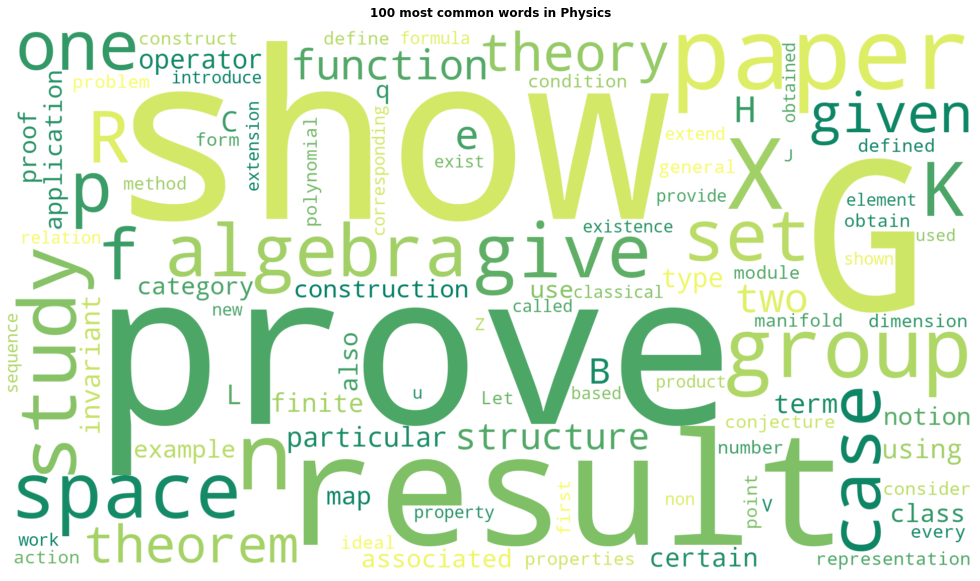

In [113]:
# Create a WordCloud 
py_df = final_df_t[(final_df_t['abstract_topic']=='Math')]

long_string = ','.join(list(py_df.abstract.values))

wordcloud = WordCloud(stopwords=stopwords.words('english') ,width=1920, height=1080, 
                      background_color="white", max_words=100, contour_width=3, 
                      colormap='summer', random_state=720)

wordcloud.generate(long_string)

plt.figure(figsize=(25,10))

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis('off')

plt.title("100 most common words in Physics", pad = 14, weight = 'bold')

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.show()

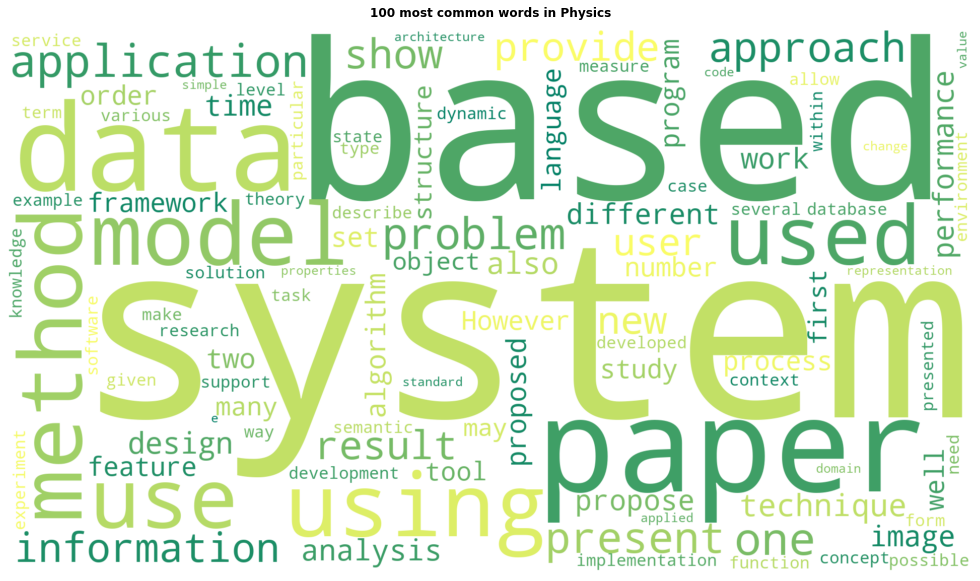

In [114]:
# Create a WordCloud 
py_df = final_df_t[(final_df_t['abstract_topic']=='CS')]

long_string = ','.join(list(py_df.abstract.values))

wordcloud = WordCloud(stopwords=stopwords.words('english') ,width=1920, height=1080, 
                      background_color="white", max_words=100, contour_width=3, 
                      colormap='summer', random_state=720)

wordcloud.generate(long_string)

plt.figure(figsize=(25,10))

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis('off')

plt.title("100 most common words in Physics", pad = 14, weight = 'bold')

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.show()

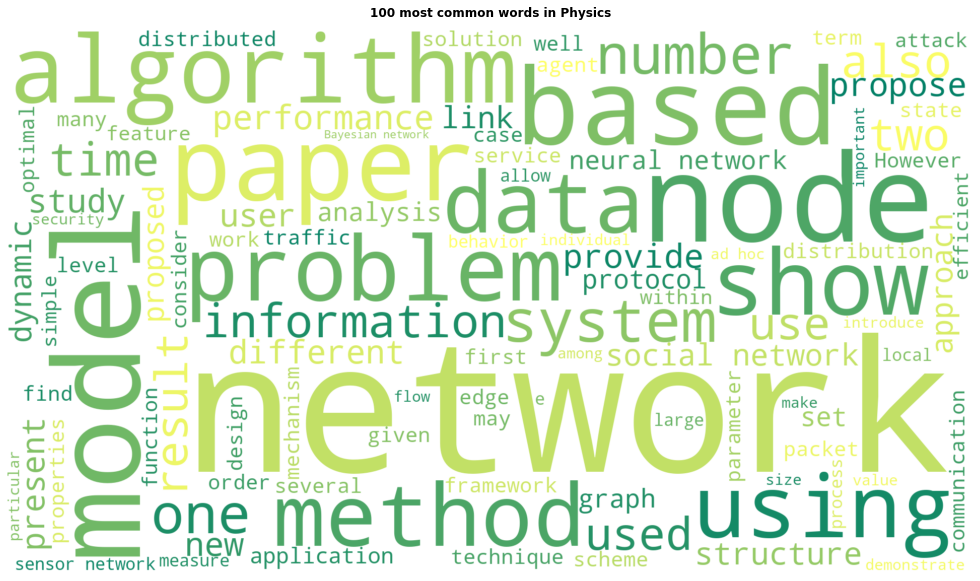

In [115]:
# Create a WordCloud 
py_df = final_df_t[(final_df_t['abstract_topic']=='IT and Network')]

long_string = ','.join(list(py_df.abstract.values))

wordcloud = WordCloud(stopwords=stopwords.words('english') ,width=1920, height=1080, 
                      background_color="white", max_words=100, contour_width=3, 
                      colormap='summer', random_state=720)

wordcloud.generate(long_string)

plt.figure(figsize=(25,10))

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis('off')

plt.title("100 most common words in Physics", pad = 14, weight = 'bold')

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.show()

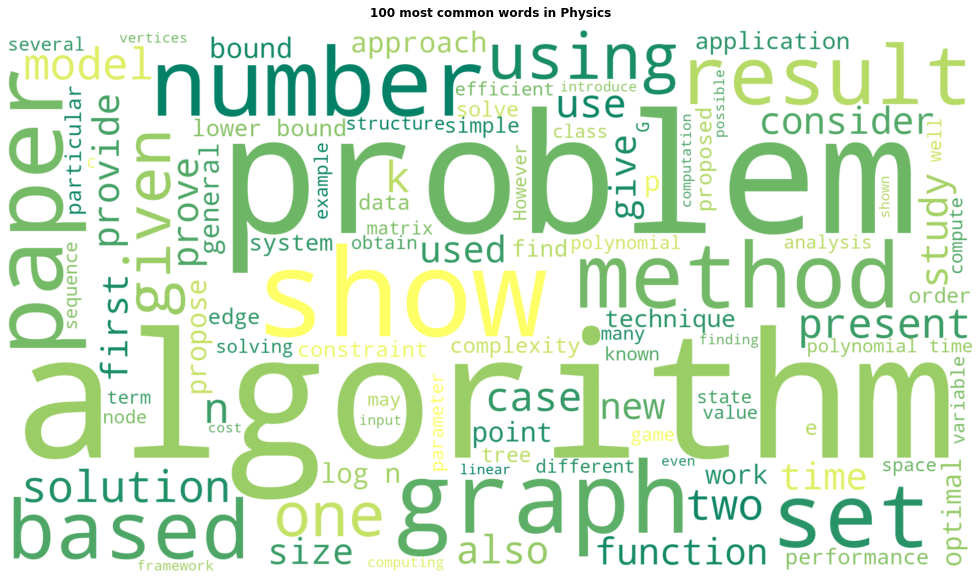

In [116]:
# Create a WordCloud 
py_df = final_df_t[(final_df_t['abstract_topic']=='ML')]

long_string = ','.join(list(py_df.abstract.values))

wordcloud = WordCloud(stopwords=stopwords.words('english') ,width=1920, height=1080, 
                      background_color="white", max_words=100, contour_width=3, 
                      colormap='summer', random_state=720)

wordcloud.generate(long_string)

plt.figure(figsize=(25,10))

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis('off')

plt.title("100 most common words in Physics", pad = 14, weight = 'bold')

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.show()

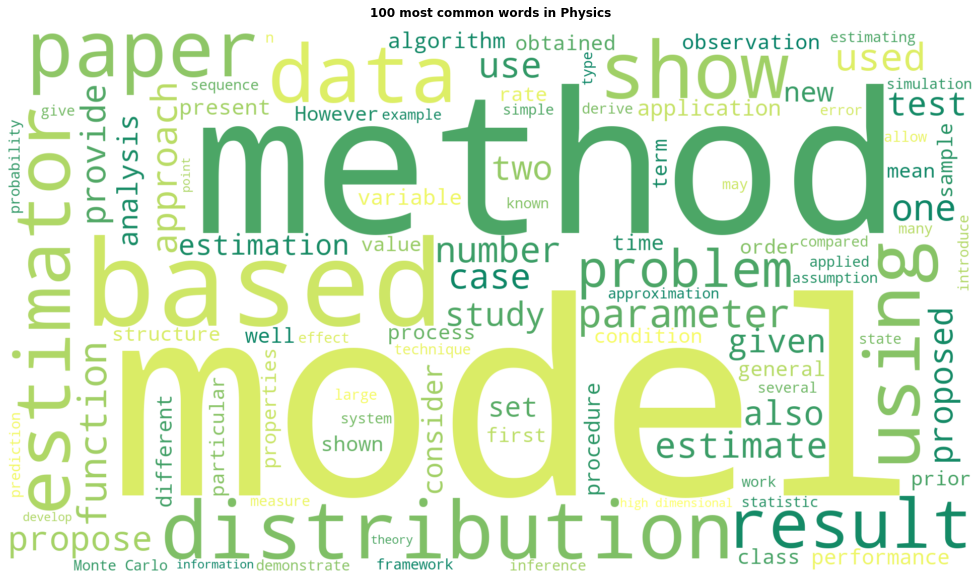

In [117]:
# Create a WordCloud 
py_df = final_df_t[(final_df_t['abstract_topic']=='Statistics')]

long_string = ','.join(list(py_df.abstract.values))

wordcloud = WordCloud(stopwords=stopwords.words('english') ,width=1920, height=1080, 
                      background_color="white", max_words=100, contour_width=3, 
                      colormap='summer', random_state=720)

wordcloud.generate(long_string)

plt.figure(figsize=(25,10))

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis('off')

plt.title("100 most common words in Physics", pad = 14, weight = 'bold')

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.show()